In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
path = "C:/Users/hp/Downloads/Zaalima Dev/ml-100k.zip"
ratings_path = os.path.join(path, "ml-100k", "u.data")
movies_path  = os.path.join(path, "ml-100k", "u.item")
users_path = os.path.join(path, "ml-100k", "u.user")

In [4]:
import zipfile

# Read files directly from the ml-100k.zip archive (path variable points to the zip)
with zipfile.ZipFile(path) as zf:
    with zf.open("ml-100k/u.data") as f:
        ratings = pd.read_csv(
            f, sep="\t",
            names=["userId", "movieId", "rating", "timestamp"]
        )

    with zf.open("ml-100k/u.item") as f:
        movies = pd.read_csv(
            f, sep="|", encoding="latin-1", header=None,
            usecols=[0, 1, 2], names=["movieId", "title", "release_date"]
        )

    with zf.open("ml-100k/u.user") as f:
        users = pd.read_csv(
            f,
            sep="|",  # columns in u.user are pipe-separated
            names=["userId", "age", "gender", "occupation", "zip_code"],
            encoding="latin-1"
        )

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
movies.head()

,movieId,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [7]:
users.head()

,userId,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
print(ratings.shape)
print(movies.shape)
print(users.shape)

(100000, 4)
(1682, 3)
(943, 5)


In [9]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
print("Movies:\n", movies.isnull().sum())

Movies:
 movieId         0
title           0
release_date    1
dtype: int64


In [11]:
print(users.isnull().sum())

userId        0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieId       1682 non-null   int64 
 1   title         1682 non-null   object
 2   release_date  1681 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.6+ KB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
# Load full movies file with genres from zip archive
col_names = ["movieId", "title", "release_date", "video_release_date", "IMDb_URL",
             "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
             "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
             "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

import zipfile
with zipfile.ZipFile(path) as zf:
    with zf.open("ml-100k/u.item") as f:
        movies = pd.read_csv(f, sep="|", encoding="latin-1", header=None, names=col_names)

In [102]:
movies.head()

,movieId,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# Drop unnecessary columns
movies = movies.drop(["video_release_date", "IMDb_URL"], axis=1)

In [18]:
movies.head()

,movieId,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:

# Extract movie year from title
movies["year"] = movies["title"].apply(
    lambda x: re.search(r"\((\d{4})\)", str(x)).group(1) if re.search(r"\((\d{4})\)", str(x)) else None
)
movies["year"] = pd.to_numeric(movies["year"], errors='coerce')

# Drop movies with missing release_date or year
movies = movies.dropna(subset=['release_date', 'year'])

# Keep users and movies with at least 5 ratings
user_counts = ratings["userId"].value_counts()
ratings = ratings[ratings["userId"].isin(user_counts[user_counts >= 5].index)]

movie_counts = ratings["movieId"].value_counts()
ratings = ratings[ratings["movieId"].isin(movie_counts[movie_counts >= 5].index)]

# Parse release_date as datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# ---------------------- Basic Info ----------------------
print("Ratings Shape:", ratings.shape)
print("Movies Shape:", movies.shape)
print("Users Shape:", users.shape)

Ratings Shape: (99287, 4)
Movies Shape: (1681, 23)
Users Shape: (943, 5)


In [20]:
print(ratings.isnull().sum())
print(movies.isnull().sum())
print(users.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId         0
title           0
release_date    0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
year            0
dtype: int64
userId        0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


In [21]:
movies.head()

,movieId,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995.0


In [22]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
users.head()

,userId,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [24]:
# Ratings statistics
print("Ratings Statistics:\n", ratings['rating'].describe())

# Number of unique users and movies
print("\nNumber of Users:", ratings['userId'].nunique())
print("Number of Movies:", ratings['movieId'].nunique())

# Movie statistics
print("\nMovies Statistics:\n", movies.describe(include='all'))


Ratings Statistics:
 count    99287.000000
mean         3.536183
std          1.121462
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

Number of Users: 943
Number of Movies: 1349

Movies Statistics:
             movieId                           title  \
count   1681.000000                            1681   
unique          NaN                            1663   
top             NaN  Designated Mourner, The (1997)   
freq            NaN                               2   
mean     841.841761                             NaN   
min        1.000000                             NaN   
25%      422.000000                             NaN   
50%      842.000000                             NaN   
75%     1262.000000                             NaN   
max     1682.000000                             NaN   
std      485.638077                             NaN   

                         release_date      unkn

## Eda

Ratings EDA

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\3689969978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\

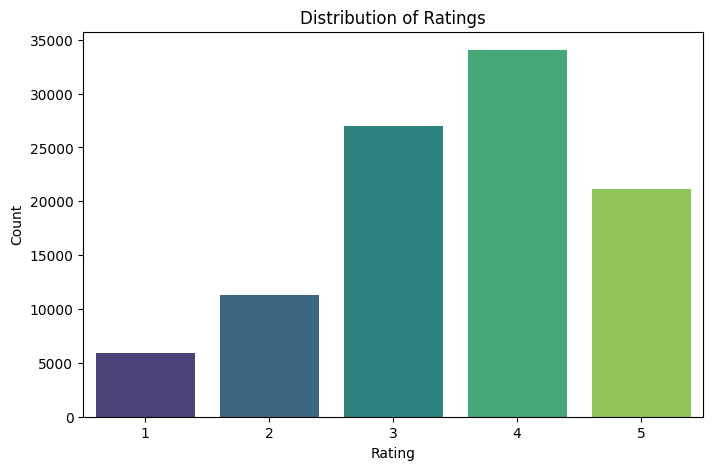

In [25]:
# Distribution of ratings
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Number of Ratings per Movie

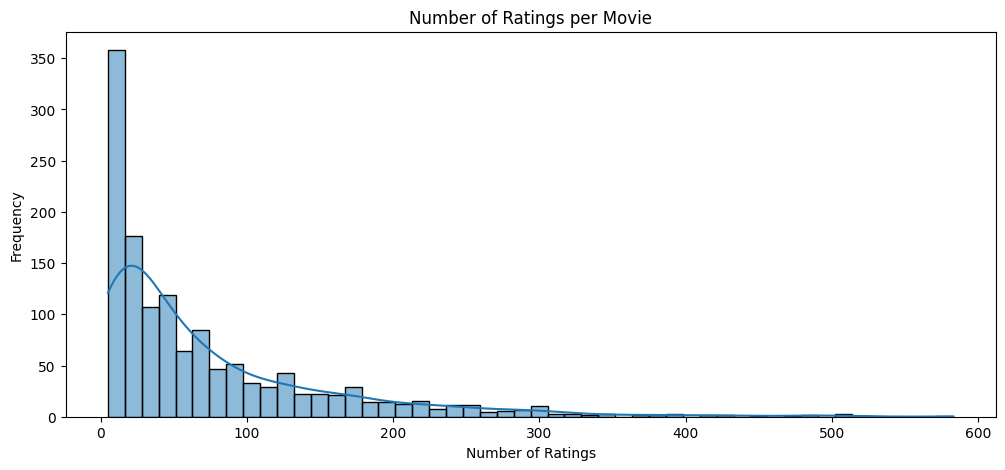

Top 5 movies with most ratings:
 movieId
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64


In [26]:
# Ratings per movie
movie_ratings_count = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()
print("Top 5 movies with most ratings:\n", movie_ratings_count.head())

Number of Ratings per User

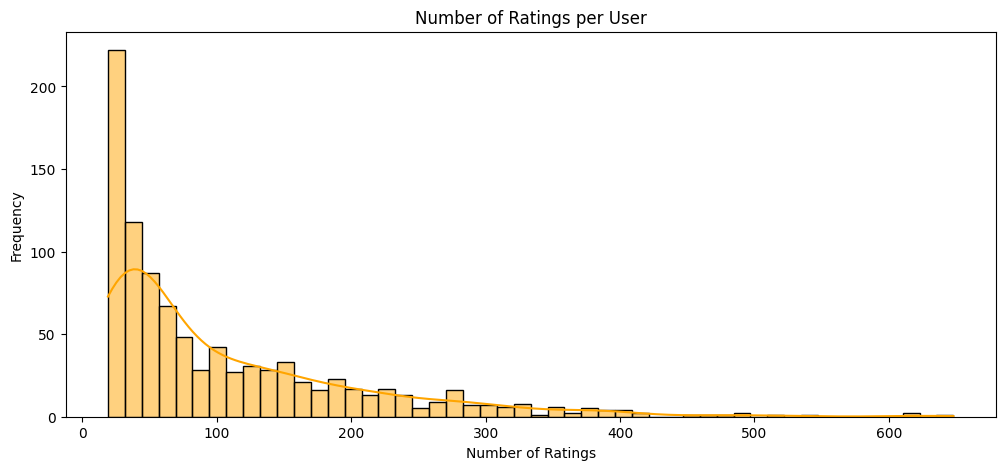

Top 5 users with most ratings:
 userId
405    648
655    621
13     614
450    535
276    516
Name: rating, dtype: int64


In [27]:
# Ratings per user
user_ratings_count = ratings.groupby('userId')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(user_ratings_count, bins=50, kde=True, color='orange')
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()
print("Top 5 users with most ratings:\n", user_ratings_count.head())

Average Rating per Movie

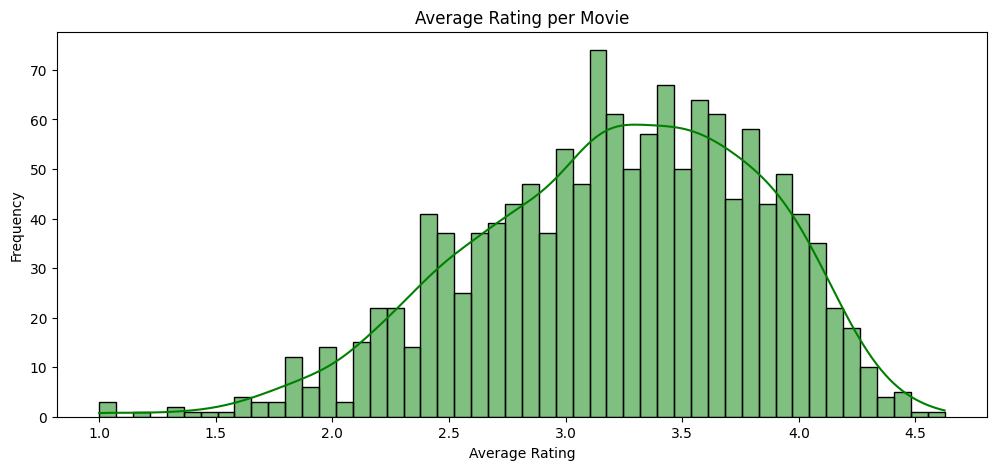

In [28]:
# Average rating per movie
avg_ratings = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(avg_ratings, bins=50, kde=True, color='green')
plt.title("Average Rating per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

Movie eda

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\1083486846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='magma')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\User

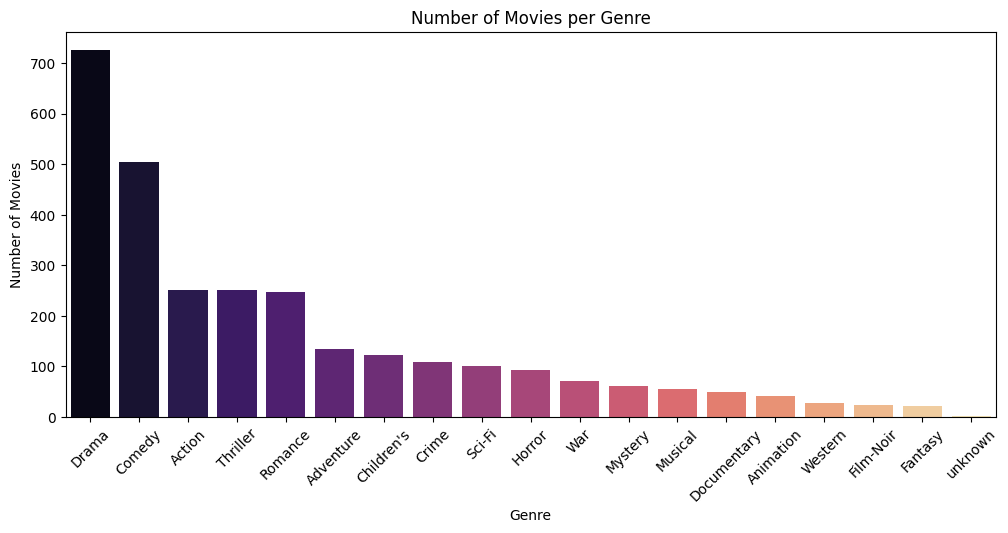

In [29]:
# Genre distribution
genre_cols = ["unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
              "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
              "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
genre_count = movies[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='magma')
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

Year-wise Movie Count

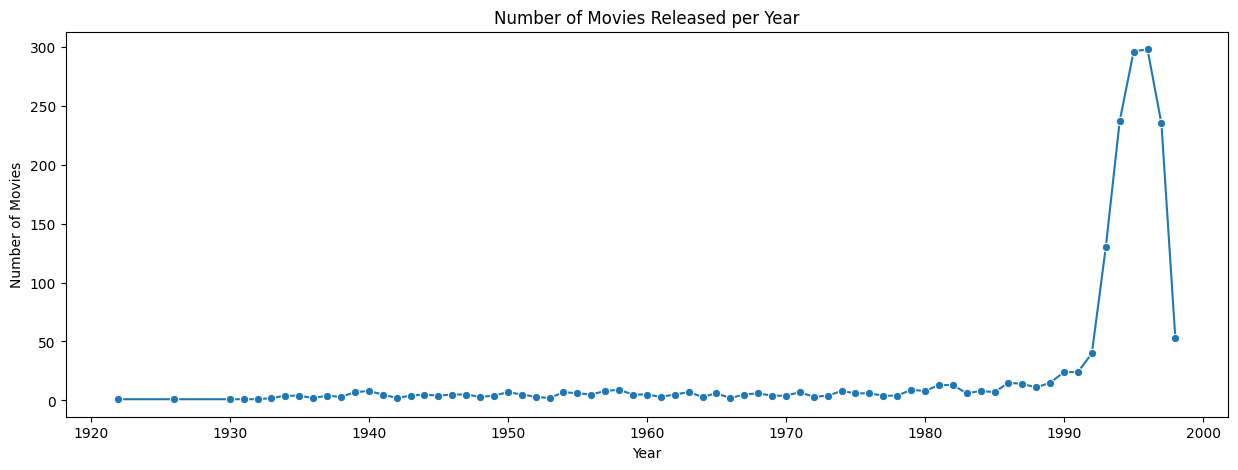

In [30]:
# Movies released per year
year_count = movies['year'].value_counts().sort_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=year_count.index, y=year_count.values, marker='o')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

user eda

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\2864848596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=users, palette='pastel')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


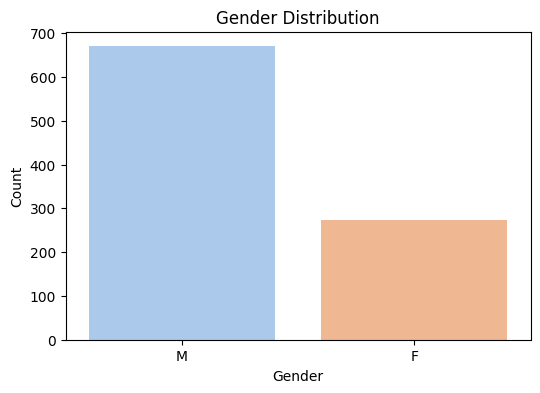

In [31]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=users, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

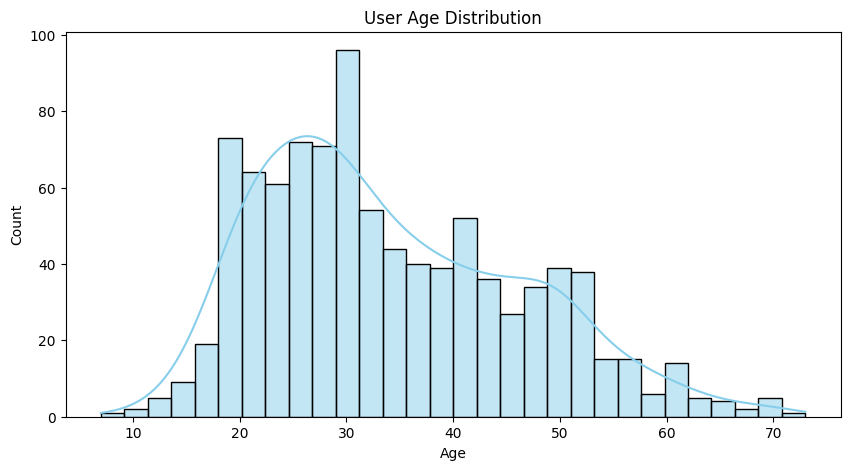

In [32]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(users['age'], bins=30, kde=True, color='skyblue')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\1642086155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='rating', data=ratings_users, palette='Set2')
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


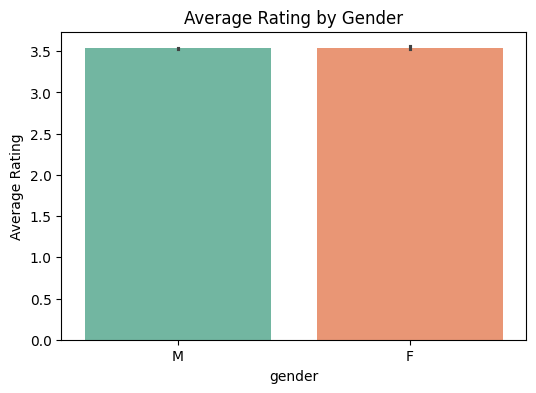

In [33]:
# Average rating by gender
ratings_users = ratings.merge(users, on='userId')
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='rating', data=ratings_users, palette='Set2')
plt.title("Average Rating by Gender")
plt.ylabel("Average Rating")
plt.show()

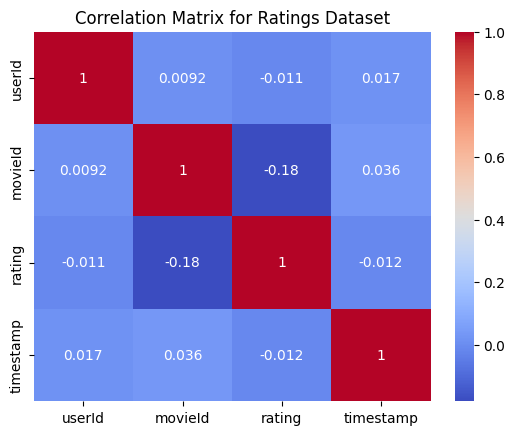

In [34]:
# ---------------------- Correlation ----------------------
sns.heatmap(ratings.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Ratings Dataset')
plt.show()

In [36]:
# Save processed files to a directory outside the zip file
processed_dir = "C:/Users/hp/Downloads/Zaalima Dev/processed"
os.makedirs(processed_dir, exist_ok=True)
ratings.to_csv(os.path.join(processed_dir, "ratings.csv"), index=False)
movies.to_csv(os.path.join(processed_dir, "movies.csv"), index=False)
users.to_csv(os.path.join(processed_dir, "users.csv"), index=False)

print("\n✅ Cleaned data saved in 'processed' folder.")



✅ Cleaned data saved in 'processed' folder.
